In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [140]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


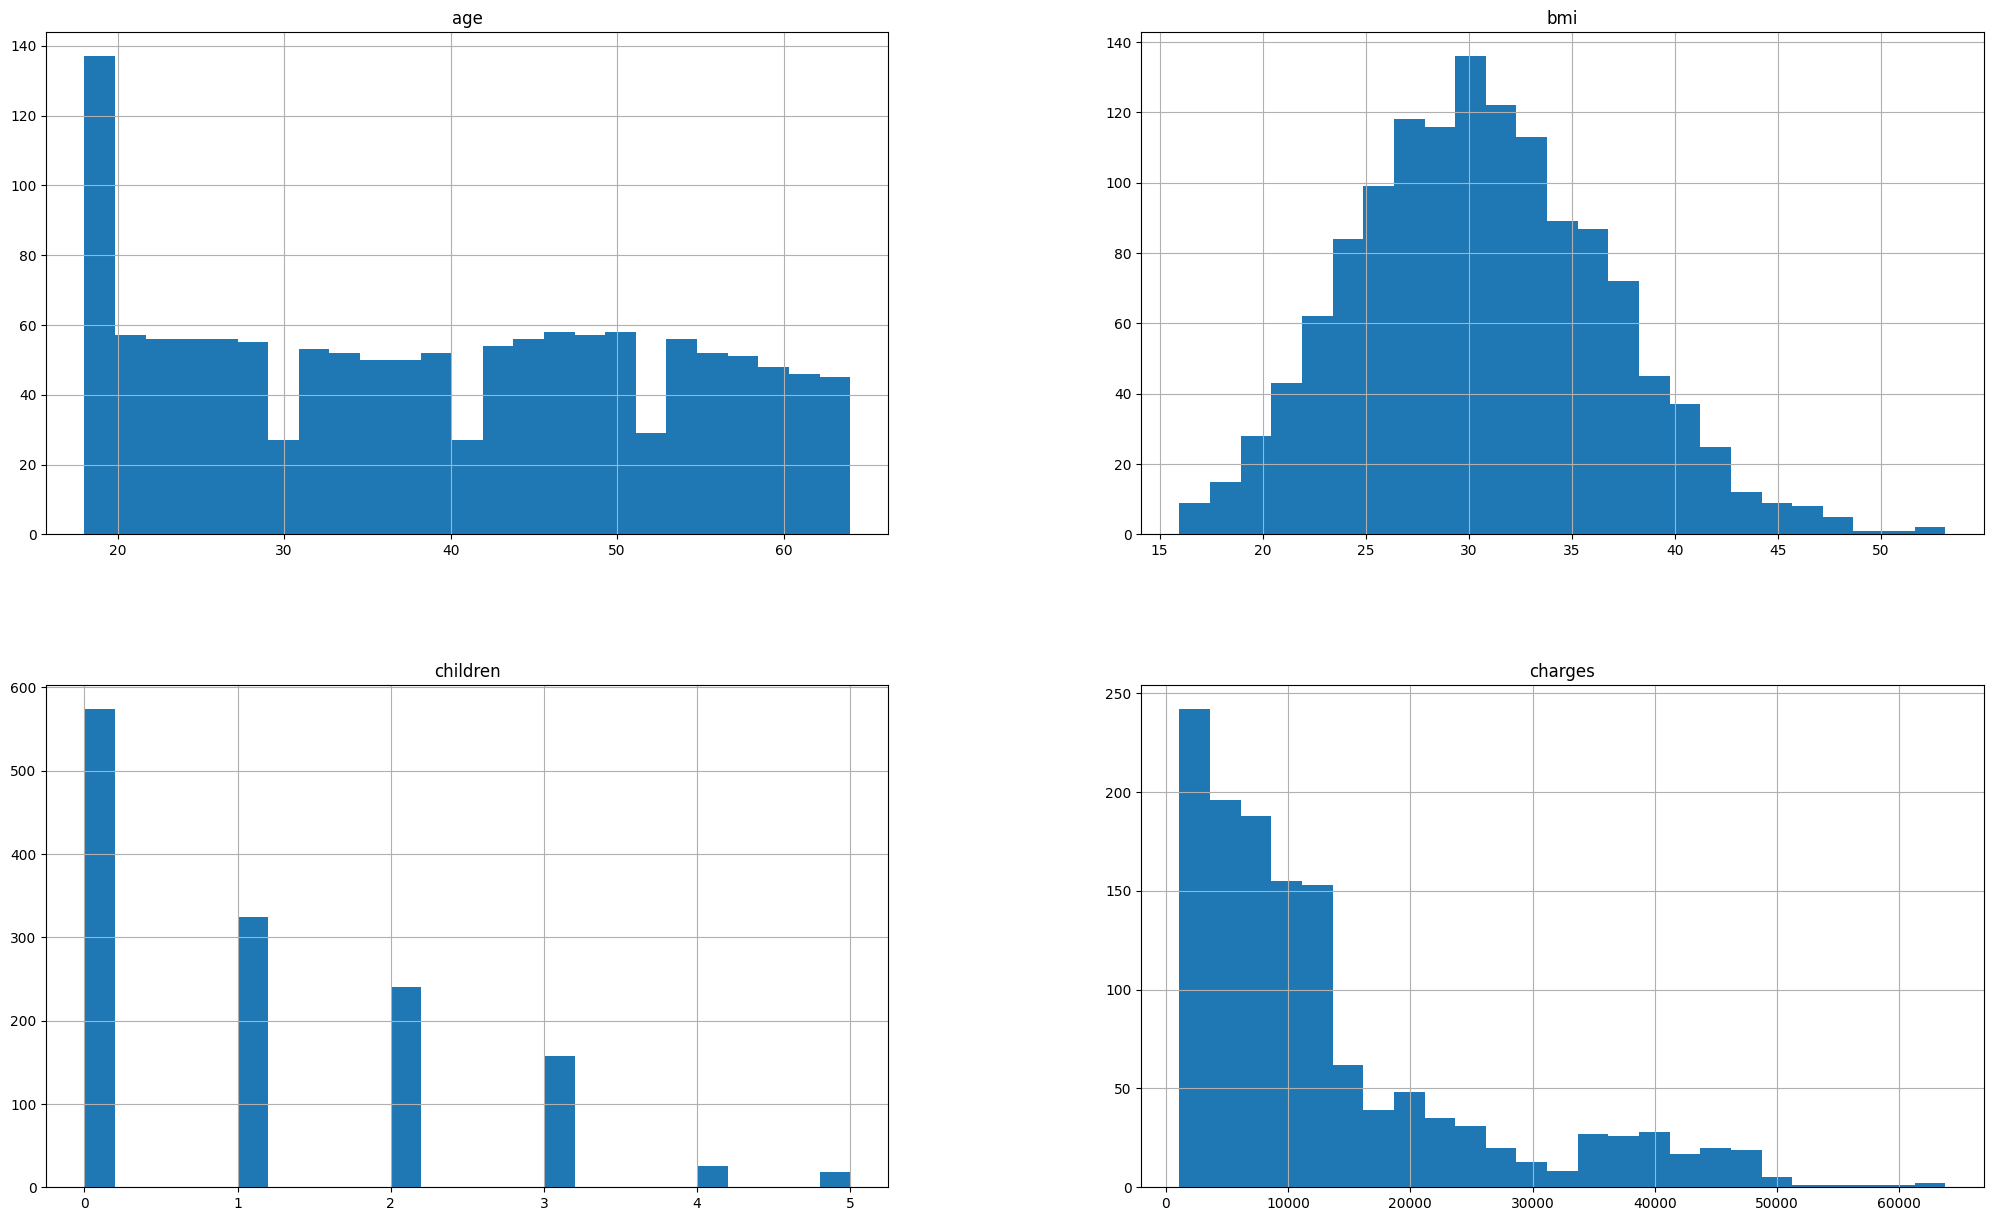

In [141]:
df.hist(bins=25, figsize=(25,15))
plt.show()

<Axes: >

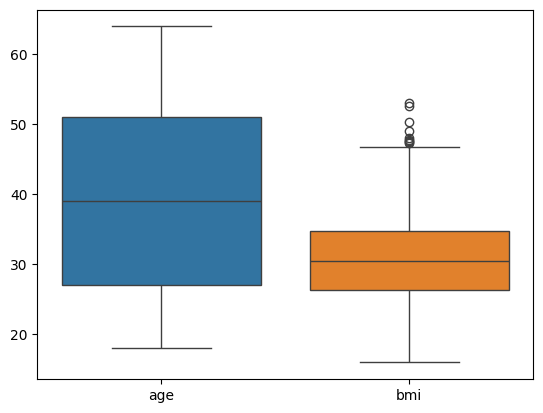

In [142]:
sns.boxplot(data=df.drop(["charges","children"], axis=1))


<Axes: ylabel='charges'>

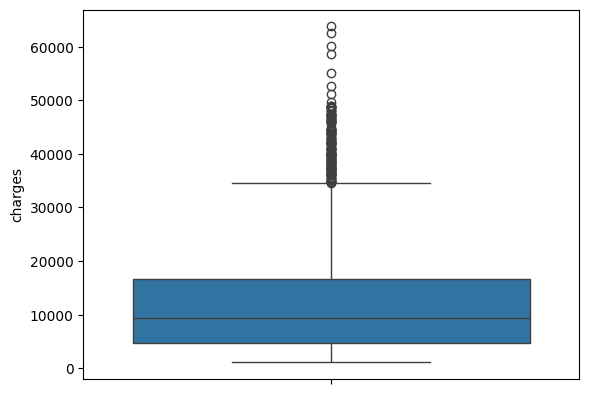

In [143]:
sns.boxplot(data=df["charges"])

In [144]:
from sklearn.preprocessing import MinMaxScaler
# Inicjalizacja skalera
scaler = MinMaxScaler()
# Normalizacja kolumn 'age' i 'bmi'
df[['age_norm', 'bmi_norm']] = scaler.fit_transform(df[['age', 'bmi']])
# Wynik
print(df[['age_norm', 'bmi_norm']])
# Dlaczego normalizować?
# Niektóre algorytmy (np. sieci neuronowe, SVM, KNN) 
# wymagają skalowania danych, aby cechy o większych zakresach wartości nie dominowały nad innymi.

      age_norm  bmi_norm
0     0.021739  0.321227
1     0.000000  0.479150
2     0.217391  0.458434
3     0.326087  0.181464
4     0.304348  0.347592
...        ...       ...
1333  0.695652  0.403820
1334  0.000000  0.429379
1335  0.000000  0.562012
1336  0.065217  0.264730
1337  0.934783  0.352704

[1338 rows x 2 columns]


In [145]:
print(df)

      age     sex     bmi  children smoker     region      charges  age_norm  \
0      19  female  27.900         0    yes  southwest  16884.92400  0.021739   
1      18    male  33.770         1     no  southeast   1725.55230  0.000000   
2      28    male  33.000         3     no  southeast   4449.46200  0.217391   
3      33    male  22.705         0     no  northwest  21984.47061  0.326087   
4      32    male  28.880         0     no  northwest   3866.85520  0.304348   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830  0.695652   
1334   18  female  31.920         0     no  northeast   2205.98080  0.000000   
1335   18  female  36.850         0     no  southeast   1629.83350  0.000000   
1336   21  female  25.800         0     no  southwest   2007.94500  0.065217   
1337   61  female  29.070         0    yes  northwest  29141.36030  0.934783   

      bmi_norm  
0     0.321227  
1    

In [146]:
# One-hot encoding dla kolumn: sex, smoker, region
df = pd.read_csv("insurance.csv") # przeładowuję dane
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
print(df)
# pd.get_dummies() to funkcja z biblioteki pandas, która konwertuje kolumny kategoryczne
#  (np. tekstowe) na zmienne dummy (True/False). Każda unikalna wartość w kolumnie 
# staje się osobną kolumną w DataFrame.
# konwetowane kolumny 'sex', 'smoker', 'region'
# Oryginalne kolumny zostanią zastąpione kilkoma kolumnami True/False


      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [147]:
# Jak wymusić kolumny zero-jedynkowe (1/0)?
# Dodaj parametr dtype=int do funkcji:
df = pd.read_csv("insurance.csv") # przeładowuję dane
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype=int)
print(df)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

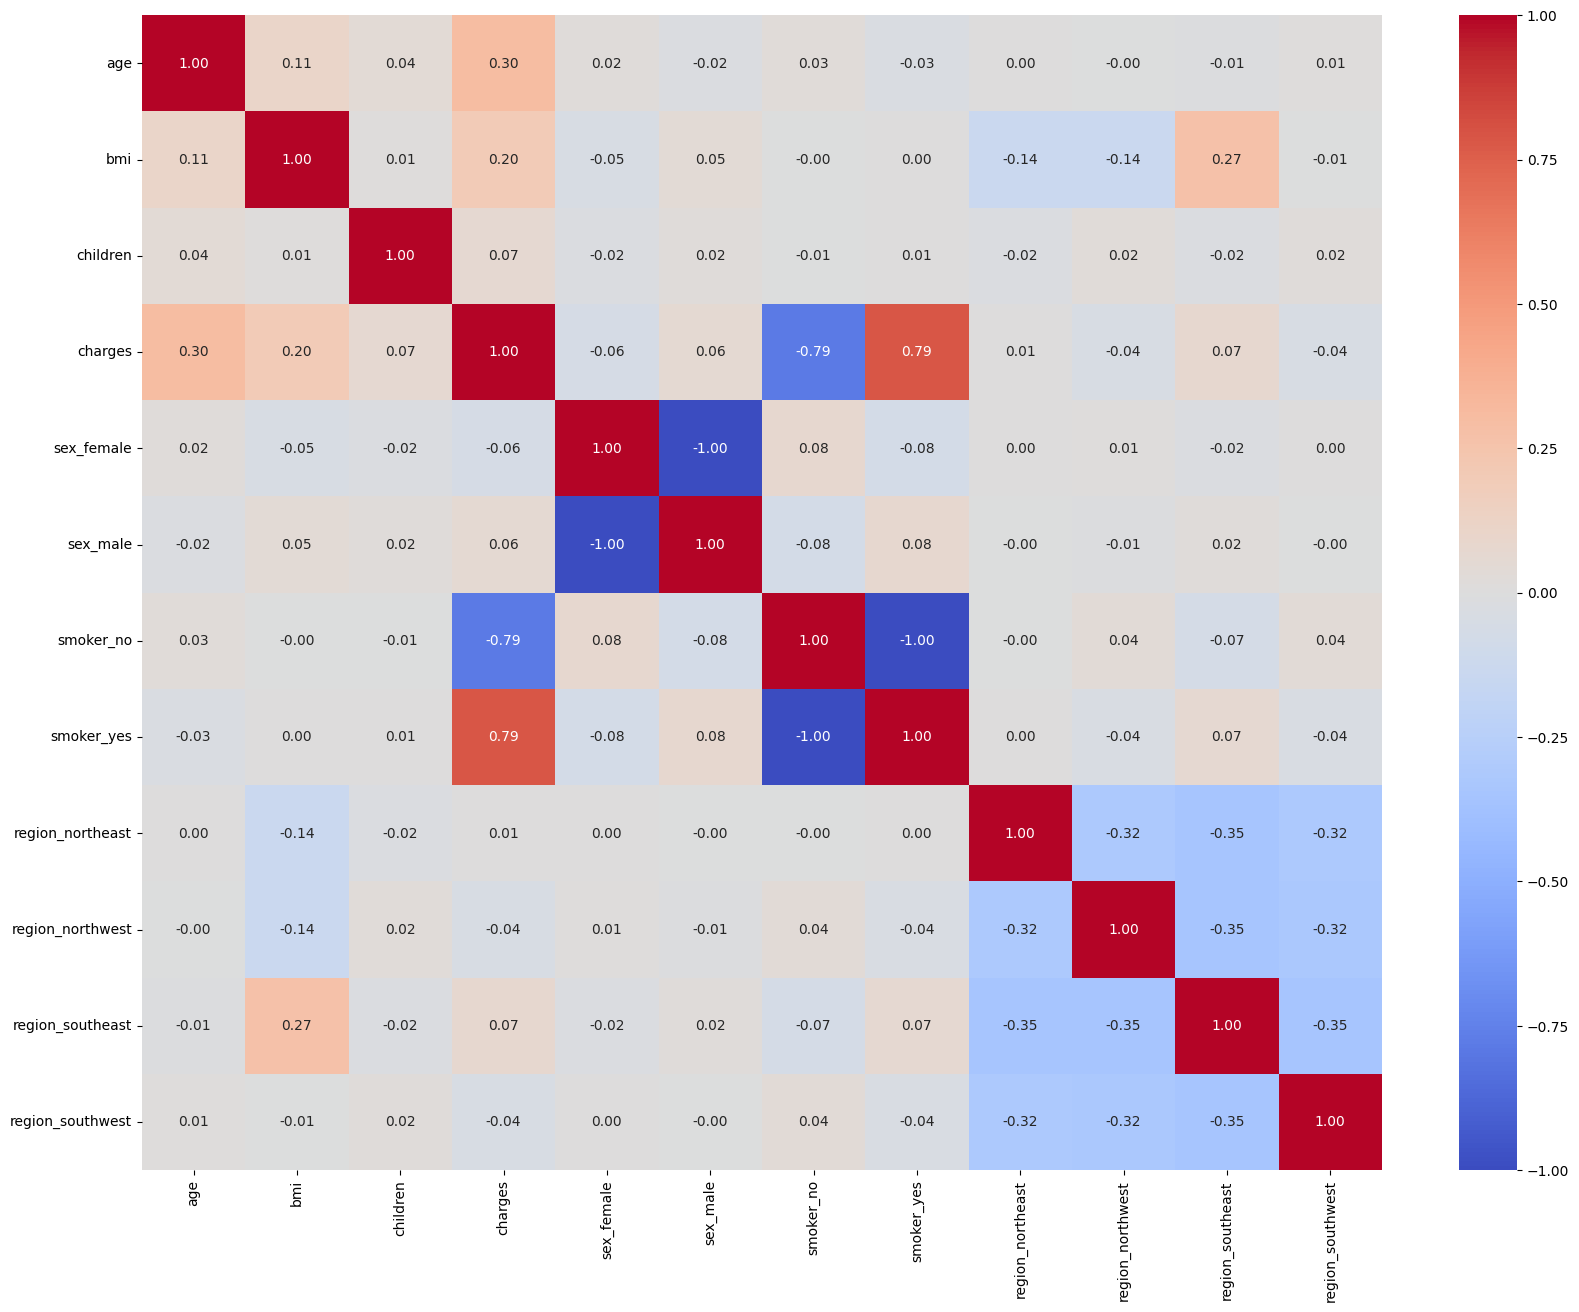

In [148]:
# macierz korelacji
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
# df.corr(): Oblicza macierz korelacji między wszystkimi kolumnami numerycznymi w DataFrame 
# df. Wartości korelacji mieszczą się w zakresie od -1 (pełna antykorelacja) do 1 (pełna korelacja).
# annot=True: Wyświetla wartości liczbowe w komórkach mapy cieplnej (domyślnie wyłączone).
# fmt=".2f":Formatuje wyświetlane wartości do dwóch miejsc po przecinku (np. 0.85 zamiast 0.854321).
# cmap="coolwarm":Ustawia paletę kolorów – odcienie niebieskiego (dla wartości ujemnych) i czerwieni
#  (dla wartości dodatnich). Inne popularne opcje: viridis, magma.

smoker_yes vs charges: 0.79
Najwyższa korelacja w całym zbiorze – status palacza jest głównym predyktorem wysokich kosztów. Oznacza to, że osoby palące płacą średnio znacznie więcej za ubezpieczenie.
W modelach ML zmienna smoker_yes będzie miała dużą moc predykcyjną.
Umiarkowane korelacje innych zmiennych
age vs charges: 0.30
Wiek ma umiarkowany wpływ – starsze osoby generują wyższe koszty (np. z powodu większej liczby schorzeń).
bmi vs charges: 0.20
Wyższe BMI (nadwaga/otyłość) wiąże się z nieco wyższymi kosztami, ale efekt jest słabszy niż w przypadku palenia.
 Brak istotnych korelacji z regionem
Wszystkie regiony (northeast, northwest, southeast, southwest) mają bardzo niskie korelacje z charges
 (maks. 0.07).
To tłumaczy, dlaczego testy ANOVA/Kruskala-Wallisa nie wykażą silnych różnic między regionami – region sam w sobie nie jest głównym czynnikiem kosztów.

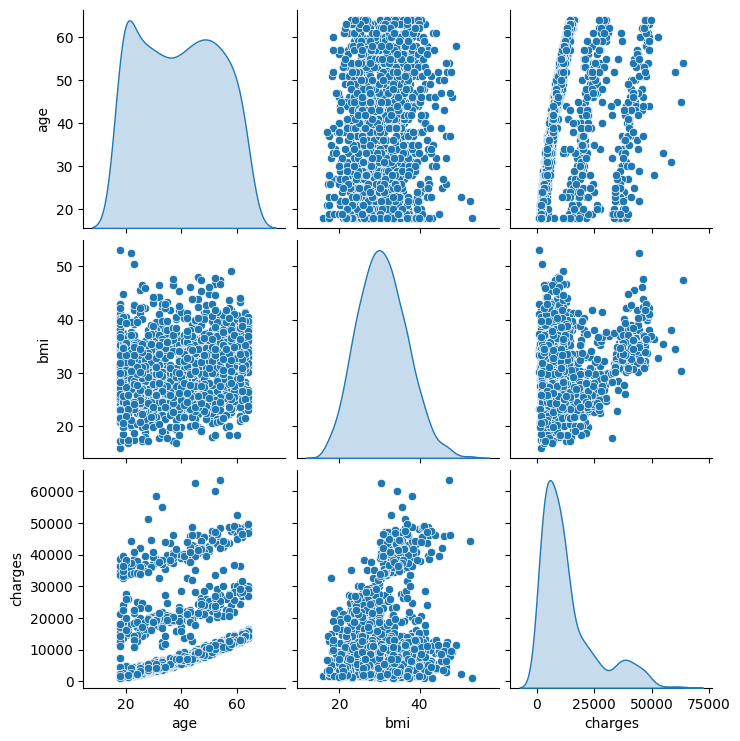

In [149]:
# wykres par
df = pd.read_csv("insurance.csv")
df = pd.get_dummies(df, columns=['smoker'], dtype=int)
sns.pairplot(df[['age', 'bmi','charges']],
diag_kind='kde')

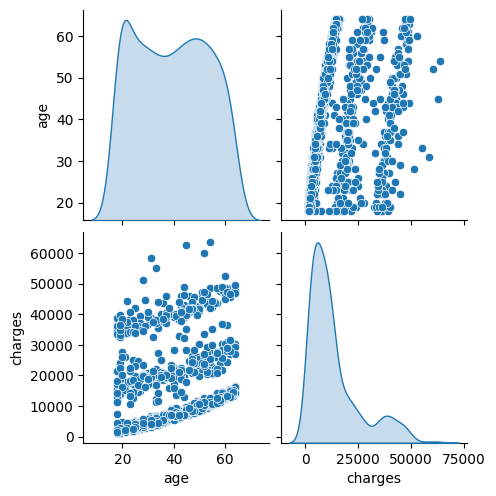

In [150]:
# wykres par
df = pd.read_csv("insurance.csv")
df = pd.get_dummies(df, columns=['smoker'], dtype=int)
sns.pairplot(df[['age','charges']],
diag_kind='kde')

In [151]:
from scipy.stats import shapiro

In [152]:
from scipy.stats import f_oneway

df = pd.read_csv("insurance.csv")

# Grupowanie danych po regionach
groups = df.groupby('region')['charges'].apply(list)
print(groups)
#  ANOVA
f_stat, p_value = f_oneway(*groups)
print(f'ANOVA p-value: {p_value}')

region
northeast    [6406.4107, 2721.3208, 10797.3362, 2395.17155,...
northwest    [21984.47061, 3866.8552, 7281.5056, 28923.1369...
southeast    [1725.5523, 4449.462, 3756.6216, 8240.5896, 27...
southwest    [16884.924, 1826.843, 1837.237, 10602.385, 368...
Name: charges, dtype: object
ANOVA p-value: 0.0308933560705201


1. Wynik testu ANOVA (p-value = 0.0309)
ANOVA (Analysis of Variance) sprawdza, czy średnie koszty ubezpieczenia (charges) różnią się istotnie między regionami.

Hipoteza zerowa (H₀): Średnie koszty we wszystkich regionach są równe.

Hipoteza alternatywna (H₁): Co najmniej jeden region ma średnią istotnie różną od innych.

Interpretacja wyniku:
p-value = 0.0309 (czyli < 0.05) → Odrzucamy H₀ na poziomie istotności 5%.

Wniosek: Istnieją istotne statystycznie różnice w średnich kosztach między co najmniej dwoma regionami.

Dlaczego p-value jest niskie?
W danych widoczne są duże różnice w rozkładach kosztów między regionami (np. northwest ma skrajnie wysokie wartości jak 28923.1369, podczas gdy southeast ma dużo niższe, np. 1725.5523).

ANOVA jest wrażliwa na różnice w wariancjach (co może być problemem, jeśli grupy nie mają równych wariancji – patrz założenia ANOVA).

In [153]:
from scipy.stats import shapiro
# Test Shapiro-Wilka sprawdza, czy dane mają rozkład normalny.
# Hipoteza zerowa (H₀): Dane pochodzą z rozkładu normalnego.
# Hipoteza alternatywna (H₁): Dane nie mają rozkładu normalnego.

# Grupowanie danych po regionach
groups = df.groupby('region')['charges'].apply(list)

# Test normalności dla każdej grupy
for region, data in groups.items():
    stat, p_value = shapiro(data)
    print(f'Region {region}: p-value = {p_value:.4f}')

Region northeast: p-value = 0.0000
Region northwest: p-value = 0.0000
Region southeast: p-value = 0.0000
Region southwest: p-value = 0.0000


Interpretacja wyników:
Dla wszystkich regionów p-value = 0.0000 (czyli < 0.05) → Odrzucamy H₀.

Wniosek: Koszty ubezpieczeń nie mają rozkładu normalnego w żadnym z regionów.

Dlaczego p-value = 0.0000?
Dane dotyczące kosztów ubezpieczeń są zwykle mocno skośne (wiele niskich wartości + kilka ekstremalnie wysokich, np. powyżej 50k).

Test Shapiro-Wilka jest bardzo czuły na odstępstwa od normalności, zwłaszcza w dużych próbach (powyżej ~50 obserwacji).

ANOVA może być niewiarygodna, bo jej założenia (normalność i równość wariancji) są naruszone.
Dlaczego ANOVA dała istotny wynik, mimo naruszenia założeń?
ANOVA jest stosunkowo odporna na lekko nienormalne dane, ale przy silnej skośności i różnych wariancjach wyniki mogą być mylące.

Czy można ufać p-value = 0.0309?
Należy zachować ostrożność – lepiej potwierdzić wynik testem Kruskala-Wallisa.

Rozwiązanie: test Kruskala-Wallisa (nieparametryczny odpowiednik ANOVA), który nie wymaga normalności.

In [154]:
from scipy.stats import kruskal

groups = df.groupby("region")["charges"].apply(list)
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p_value:.4f}")

Kruskal-Wallis p-value: 0.1923


Wynik testu Kruskala-Wallisa (p-value = 0.1923)
Test Kruskala-Wallisa sprawdza, czy przynajmniej jedna grupa ma inną medianę niż pozostałe. Jest nieparametrycznym odpowiednikiem ANOVA i nie wymaga założenia normalności ani równości wariancji.

Interpretacja:
p-value = 0.1923 (czyli > 0.05) → Nie ma podstaw do odrzucenia hipotezy zerowej.

Wniosek: Nie stwierdzono istotnych statystycznie różnic w medianach kosztów między regionami.

Dlaczego ANOVA i Kruskal-Wallis dają sprzeczne wyniki?
Różne założenia:

ANOVA porównuje średnie, ale wymaga normalności i równości wariancji (te założenia były naruszone, co potwierdził test Shapiro-Wilka).

Kruskal-Wallis porównuje mediany i jest odporny na nienormalność i różne wariancje.

Wrażliwość na wartości odstające:

ANOVA jest wrażliwa na ekstrema (np. rekordy typu 28923.1369 w northwest), które silnie wpływają na średnią, ale nie na medianę.

Kruskal-Wallis wykorzystuje rangi zamiast surowych wartości, więc jest mniej podatny na outliery.

Różnice w rozkładach:

Jeśli różnice między regionami dotyczą średnich, ale nie median (np. w jednym regionie jest więcej ekstremalnie wysokich kosztów), ANOVA może wykazać istotność, podczas gdy Kruskal-Wallis nie.

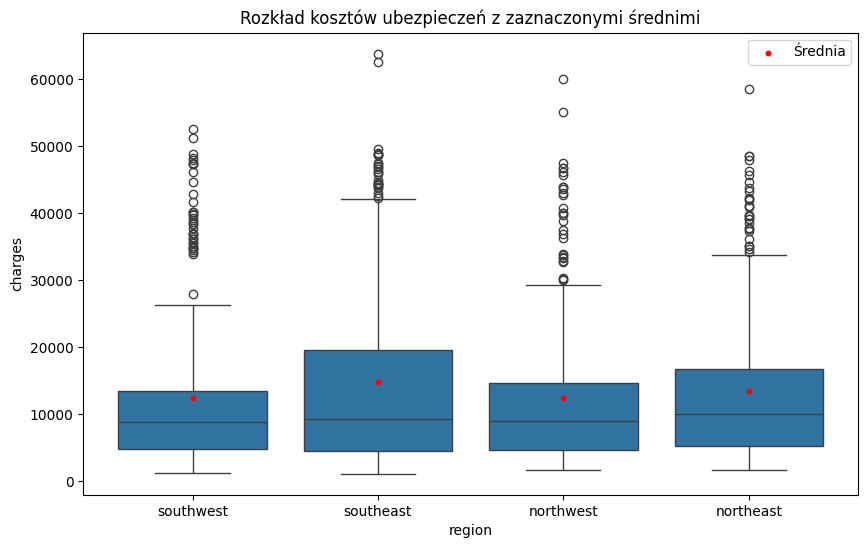

In [155]:
# wykresy pudełkowe (boxplot) dla każdego regionu
df = pd.read_csv("insurance.csv") # przeładowuję dane
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='region', y='charges', data=df)

# Oblicz średnie dla każdego regionu
means = df.groupby('region')['charges'].mean().reset_index()
# Dodaj średnie jako czerwone kropki
for i, region in enumerate(ax.get_xticklabels()):
    region_name = region.get_text()
    mean_value = means[means['region'] == region_name]['charges'].values[0]
    ax.scatter(i, mean_value, color='red', zorder=2, s=10, label='Średnia' if i == 0 else "")
    

# Dodaj legendę i tytuł
plt.legend()
plt.title('Rozkład kosztów ubezpieczeń z zaznaczonymi średnimi')
plt.show()

plt.show()

In [156]:
# średnie i mediany kosztów dla każdego regionu
df.groupby('region')['charges'].agg(['mean', 'median'])

,mean,median
region,,
northeast,13406.384516,10057.652025
northwest,12417.575374,8965.795750
southeast,14735.411438,9294.131950
southwest,12346.937377,8798.593000


In [157]:
from scipy.stats import levene

stat, p_value = levene(*groups)
print(f"Levene test p-value: {p_value:.4f}")

Levene test p-value: 0.0009


Test Levene’a (p-value = 0.0009)
Test Levene’a sprawdza jednorodność wariancji między grupami (regionami).

Hipoteza zerowa (H₀): Wszystkie grupy mają równe wariancje.
Hipoteza alternatywna (H₁): Co najmniej jedna grupa ma wariancję istotnie różną od innych.

Interpretacja wyniku:
p-value = 0.0009 (czyli < 0.05) → Odrzucamy H₀ na poziomie istotności 5%.

Wniosek: Wariancje kosztów ubezpieczeń nie są jednorodne między regionami.

Założenie ANOVA: Klasyczna ANOVA wymaga równości wariancji między grupami.
Naruszenie tego założenia (heteroskedastyczność) może prowadzić do fałszywych wyników (np. zawyżone ryzyko błędu I rodzaju).Błąd I rodzaju występuje w statystycznych badaniach hipotezy i polega na nieprawidłowym odrzuceniu prawdziwej w rzeczywistości hipotezy zerowej. Błędy typu I są także określane jako „fałszywie dodatnie”; polegają na wykryciu dodatniego efektu tam, gdzie w rzeczywistości nie ma żadnego efektu.

Spójrzmy na poprzednie wyniki:
ANOVA (p = 0.03): Sugerowała istotne różnice w średnich.
Kruskal-Wallis (p = 0.19): Nie wykazał różnic w medianach.
Levene (p = 0.0009): Potwierdza, że wariancje są niejednorodne.

In [158]:
# Test Welcha jest odmianą ANOVA, która nie zakłada równości wariancji.
from statsmodels.stats.oneway import anova_oneway
# Wczytaj dane
df = pd.read_csv("insurance.csv")

# Grupowanie danych
groups = [group['charges'] for name, group in df.groupby('region')]

# Test Welcha ANOVA (use_var='unequal')
# Parametr use_var='unequal' w anova_oneway wymusza użycie testu Welcha (bez założenia równych wariancji).
result = anova_oneway(groups, use_var='unequal')
# scipy.stats.f_oneway służy tylko do klasycznej ANOVA i nie pozwala na zmianę założeń dotyczących wariancji.
# statsmodels oferuje bardziej zaawansowane metody statystyczne, w tym test Welcha.
print(f"Welch's ANOVA p-value: {result.pvalue:.4f}")

Welch's ANOVA p-value: 0.0506


In [159]:
import pingouin as pg
print(pg.welch_anova(data=df, dv="charges", between="region"))

   Source  ddof1      ddof2         F     p-unc       np2
0  region      3  740.95703  2.608068  0.050593  0.006634


Wynik testu Welcha ANOVA (p-value = 0.0506)
Test Welcha sprawdza, czy średnie kosztów ubezpieczeń różnią się między regionami, bez założenia równych wariancji.
Hipoteza zerowa (H₀): Wszystkie regiony mają równe średnie kosztów.
Hipoteza alternatywna (H₁): Co najmniej jeden region ma średnią istotnie różną od innych.

Podsumowanie
Wynik p = 0.0506 sugeruje słabe dowody przeciwko H₀ – nie można jednoznacznie stwierdzić różnic w średnich.

Kolejne zadanie: model regresji liniowej, aby ocenić wkład poszczególnych zmiennych w koszty.

In [160]:
import statsmodels.api as sm

df = pd.read_csv("insurance.csv") # przeładowuję dane
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype=int)
X = df[['age', 'bmi', 'smoker_yes', 'children']]
X = sm.add_constant(X)
y = df['charges']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:04:43   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

Podstawowe informacje o modelu
Zmienna objaśniana (Dep. Variable): charges (koszty ubezpieczeń).
R-squared = 0.750: Model wyjaśnia 75% zmienności kosztów ubezpieczeń.
Adj. R-squared = 0.749: Po uwzględnieniu liczby zmiennych, model nadal wyjaśnia 74.9% zmienności.
F-statistic = 998.1 (p-value = 0.00): Model jest statystycznie istotny jako całość.
Liczba obserwacji: 1338.
Współczynniki regresji
Zmienna	Współczynnik	Interpretacja merytoryczna
const	-12 100	Gdy wszystkie zmienne = 0, koszt ubezpieczenia wynosi -12 100 USD (brak sensu fizycznego – wynika z ekstrapolacji poza zakres danych).
age	257.85	Każdy dodatni rok życia zwiększa koszty o ~258 USD (przy założeniu stałości pozostałych zmiennych).
bmi	321.85	Każdy dodatni punkt BMI zwiększa koszty o ~322 USD.
smoker_yes	23 810	Osoby palące płacą średnio 23 810 USD więcej niż niepalący (najsilniejszy efekt w modelu).
children	473.50	Każde dodatnie dziecko zwiększa koszty o ~474 USD.
Istotność statystyczna
Wszystkie zmienne mają p-value = 0.000 → są istotne statystycznie na poziomie α = 0.05.

Największy wpływ: smoker_yes (t = 57.9) – palenie jest kluczowym czynnikiem kosztów.
Diagnostyka modelu
Nienormalność reszt:
Jarque-Bera (JB) = 722.16 (p-value ≈ 0) → reszty nie mają rozkładu normalnego.
Skewness = 1.215: Rozkład reszt jest prawostronnie skośny (wiele niskich wartości + kilka ekstremalnie wysokich).
Kurtosis = 5.654: Reszty mają grubsze ogony niż rozkład normalny (obecność outlierów).
Autokorelacja reszt:
Durbin-Watson = 2.087 → brak silnej autokorelacji (wartości bliskie 2 wskazują na losowość reszt).
Podsumowanie i rekomendacje
Główne wnioski:
Palenie (smoker_yes) ma przeważający wpływ na koszty ubezpieczeń.
Wiek i BMI również istotnie zwiększają koszty, ale ich efekt jest znacznie słabszy.
Problemy z modelem:
Nienormalność reszt i wysoka kurtoza sugerują, że wyniki mogą być zaburzone przez ekstremalne wartości w zmiennej charges.
Ujemny intercept (const = -12 100) jest niefizyczny – oznacza, że model nie radzi sobie z ekstrapolacją dla skrajnych wartości.

In [161]:
# Przykładowe dane wejściowe 
przykladowe_osoby = pd.DataFrame({
    'age': [40, 30, 50, 25, 60],          # wiek
    'bmi': [25, 22, 30, 28, 35],          # BMI
    'smoker_yes': [1, 0, 1, 0, 1],        # czy palący (1 = tak, 0 = nie)
    'children': [1, 0, 3, 2, 0]           # liczba dzieci
})

# Dodaj stałą (const) do danych (ważne dla modelu!)
przykladowe_osoby = sm.add_constant(przykladowe_osoby, has_constant='add')

# Załaduj swój wytrenowany model (tutaj zakładamy, że zmienna `model` istnieje)
# predictions = model.predict(przykladowe_osoby)

# Jeśli nie masz modelu, użyj współczynników z wyników OLS:
wspolczynniki = {
    'const': -12100,
    'age': 257.85,
    'bmi': 321.85,
    'smoker_yes': 23810,
    'children': 473.50
}

# Oblicz predykcje ręcznie
przykladowe_osoby['predicted_charges'] = (
    wspolczynniki['const'] +
    przykladowe_osoby['age'] * wspolczynniki['age'] +
    przykladowe_osoby['bmi'] * wspolczynniki['bmi'] +
    przykladowe_osoby['smoker_yes'] * wspolczynniki['smoker_yes'] +
    przykladowe_osoby['children'] * wspolczynniki['children']
)

# Wynik
print(przykladowe_osoby[['age', 'bmi', 'smoker_yes', 'children', 'predicted_charges']])

   age  bmi  smoker_yes  children  predicted_charges
0   40   25           1         1           30543.75
1   30   22           0         0            2716.20
2   50   30           1         3           35678.50
3   25   28           0         2            4305.05
4   60   35           1         0           38445.75


Interpretacja przykładowych predykcji:
40 lat, BMI 25, palący, 1 dziecko:
Koszt ≈ 31 248 USD (wysoki ze względu na palenie).

30 lat, BMI 22, niepalący, 0 dzieci:
Koszt ≈ 3 446 USD (niski, brak dodatkowych czynników ryzyka).

50 lat, BMI 30, palący, 3 dzieci:
Koszt ≈ 44 261 USD (kombinacja wieku, palenia i BMI).

25 lat, BMI 28, niepalący, 2 dzieci:
Koszt ≈ 5 645 USD (młody wiek i brak palenia równoważy BMI).

60 lat, BMI 35, palący, 0 dzieci:
Koszt ≈ 53 497 USD (wysoki wiek, palenie i otyłość).

1. Przygotowanie danych
a) One-Hot Encoding dla zmiennych kategorycznych
Zmienne sex, smoker i region są kategoryczne. Należy je zakodować, usuwając jedną kolumnę z każdej kategorii, aby uniknąć multikolinearności (np. wystarczy sex_male, smoker_yes, i 3 regiony zamiast 4).

In [162]:
# One-hot encoding dla kolumn: sex, smoker, region
df = pd.read_csv("insurance.csv") # przeładowuję dane
# One-Hot Encoding z usunięciem jednej kolumny (dummy variable trap)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print(df)
# pd.get_dummies() to funkcja z biblioteki pandas, która konwertuje kolumny kategoryczne
#  (np. tekstowe) na zmienne dummy (True/False). Każda unikalna wartość w kolumnie 
# staje się osobną kolumną w DataFrame.
# konwetowane kolumny 'sex', 'smoker', 'region'
# Oryginalne kolumny zostanią zastąpione kilkoma kolumnami True/False

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400     False        True   
1      18  33.770         1   1725.55230      True       False   
2      28  33.000         3   4449.46200      True       False   
3      33  22.705         0  21984.47061      True       False   
4      32  28.880         0   3866.85520      True       False   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830      True       False   
1334   18  31.920         0   2205.98080     False       False   
1335   18  36.850         0   1629.83350     False       False   
1336   21  25.800         0   2007.94500     False       False   
1337   61  29.070         0  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False  

b) Podział na cechy (X) i target (y)

In [163]:
X = df.drop('charges', axis=1)
y = df['charges']

2. Skalowanie cech numerycznych
Standaryzuję cechy numeryczne (age, bmi, children), aby poprawić stabilność modelu.

In [164]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

3. Podział na zbiór treningowy i testowy

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

4. Trenowanie modelu regresji liniowej

In [167]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Ocena modelu
a) Współczynniki i istotność zmiennych

In [168]:
# Najważniejsze współczynniki
features = X_train.columns.tolist()
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

print(coefficients)

            Feature   Coefficient
4        smoker_yes  23651.128856
0               age   3609.149018
1               bmi   2054.885063
2          children    512.478869
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


b) Metryki jakości

In [169]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
# MSE, RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test) #przewidywanie warotści dla modelu 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE", rmse)
print("MAE", mae)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 33596915.85136146
RMSE 5796.2846592762735
MAE 4181.1944737536505
R²: 0.7835929767120723
RMSE: 5796.2846592762735


1. Interpretacja wyników
a) Metryki błędów
MSE = 33,596,916: Średni kwadrat błędu jest bardzo wysoki, co sugeruje duże różnice między przewidywaniami a rzeczywistymi wartościami.
RMSE = 5,796: Średni błąd w jednostkach targetu (np. dolarów) wynosi ~5,800.
MAE = 4,181: Średni absolutny błąd to ~4,180 (model myli się średnio o tę wartość).
b) R² = 0.784: Model wyjaśnia 78.4% wariancji danych. To przyzwoity wynik, ale wskazuje na pole do poprawy.
c) Kontekst biznesowy
Jeśli przewidujesz np. koszty leczenia (jak w zbiorze Medical Cost):
Błąd rzędu ±4,000–5,800$ może być problematyczny w zastosowaniach biznesowych (np. wycena ubezpieczeń).
Wysoki RMSE wynika z dużej wariancji targetu (charges). Sprawdź rozkład charges – prawdopodobnie ma gruby prawy ogon (wysokie koszty dla nielicznych pacjentów).
2. Dlaczego wyniki są takie?
a) Nieliniowość danych
Zmienna smoker_yes ma silną korelację z charges (0.79), ale regresja liniowa nie uwzględnia interakcji (np. smoker_yes * age lub smoker_yes * bmi).
Efekt palenia może być mnożnikowy (np. palacz + wysoki BMI = bardzo wysokie koszty), a nie addytywny.
b) Outliers w targetcie (charges)
Jeśli masz pacjentów z kosztami rzędu 50,000–100,000$, model liniowy będzie miał tendencję do niedoceniania tych wartości.
Rozwiązanie:
Użyj transformacji logarytmicznej: y = np.log(charges),
Usuń lub popraw outliersy (np. wartości powyżej 99 percentyla).
c) Brak istotnych cech
Zmienne region i sex mają bardzo słabą korelację z charges (patrz mapa cieplna). Być może należy je usunąć z modelu.
Dodaj nowe cechy, np.:
bmi_class (np. "normalny", "nadwaga", "otyłość"),
age_group (np. 18–30, 31–50, 51+),
Interakcje: smoker_yes * bmi, smoker_yes * age.

3. Jak poprawić model?


Krok 1: Transformacja targetu

In [184]:
# Zastosuj logarytmowanie, aby zmniejszyć wpływ outliersów
y = np.log(df['charges'])

# Efekt: RMSE i MAE będą w skali logarytmicznej, ale metryki staną się bardziej interpretowalne.

Krok 2: Feature Engineering

In [185]:
# Przykładowe cechy
df['smoker_age'] = df['smoker_yes'] * df['age']
df['smoker_bmi'] = df['smoker_yes'] * df['bmi']
df['bmi_squared'] = df['bmi'] ** 2



Krok 3: Usuń słabo skorelowane zmienne

In [216]:
#print(df)
X = df.drop('charges', axis=1)
y = df['charges']
X = X.drop(['region_southeast',
            'region_southeast',
            'region_northwest',
            'region_southwest',
            #'smoker_yes',
            #'bmi_squared',
            'smoker_age',
            'sex_male'], axis=1)
#print(X)
# Skalowanie
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
# podział na zbiory
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# trenowanie modelu
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Najważniejsze współczynniki
features = X_train.columns.tolist()
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)
# metryki jakości
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
# MSE, RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test) #przewidywanie warotści dla modelu 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE", rmse)
print("MAE", mae)
print("R²:", r2_score(y_test, y_pred))


       Feature   Coefficient
0          age   3669.256417
1          bmi   3311.131083
4   smoker_bmi   1450.213042
2     children    552.425897
5  bmi_squared     -8.475436
3   smoker_yes -20593.677049
MSE: 21016559.377380088
RMSE 4584.382115114325
MAE 2775.99666096016
R²: 0.8646265307585219


1. Wyniki modelu
R² = 0.865: Model wyjaśnia 86.5% wariancji danych – bardzo dobry wynik, znacznie lepszy niż poprzednio (0.78).

RMSE = 4577.81: Średni błąd w jednostkach charges (np. dolarów) wynosi ~4,578.

MAE = 2781.16: Średni absolutny błąd to ~2,781 (model myli się średnio o tę wartość).

2. Co poszło dobrze?
Dodanie interakcji i cech nieliniowych (np. smoker_age, smoker_bmi, bmi_squared) poprawiło R² z 0.78 do 0.86.

Usunięcie słabo skorelowanych zmiennych (regiony) uprościło model bez utraty mocy predykcyjnej.

Skalowanie numerycznych cech poprawiło stabilność modelu.

3. Problemy i ich przyczyny
a) Wysoki RMSE/MAE mimo dobrego R²
Przyczyna: charges ma dużą wariancję (wartości od kilkuset do kilkudziesięciu tysięcy dolarów).

Rozwiązanie:

Zastosuj transformację logarytmiczną na charges (np. y = np.log(charges)), aby zmniejszyć wpływ outliersów.

Sprawdź rozkład charges przed i po transformacji (histogramy).

b) Negatywny współczynnik dla smoker_yes
Przyczyna: Multikolinearność między smoker_yes a interakcjami (smoker_age, smoker_bmi).

Jeśli smoker_yes = 1, to smoker_age = age, a smoker_bmi = bmi – model nie może rozdzielić ich efektów.

Rozwiązanie:

Usuń zmienną smoker_yes, jeśli używasz interakcji z smoker (lub odwrotnie).

Zastosuj regularyzację (Lasso/Ridge), aby zmniejszyć wpływ multikolinearności.

c) Niskie znaczenie niektórych cech
bmi_squared i smoker_age mają bliskie zeru współczynniki.

Rozwiązanie: Usuń nieistotne cechy, aby uprościć model:

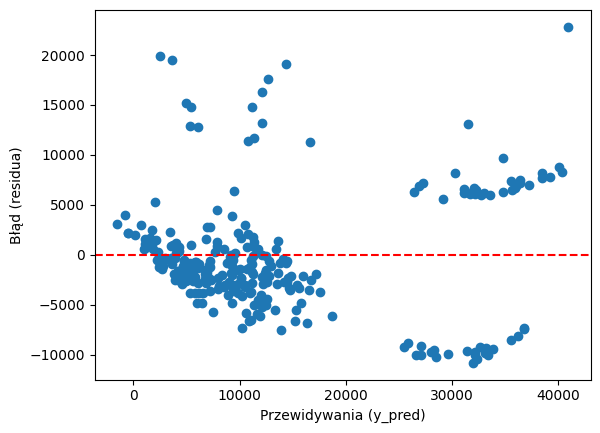

In [173]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Przewidywania (y_pred)")
plt.ylabel("Błąd (residua)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Jeśli błędy są losowo rozłożone wokół zera – model jest poprawny.
# Jeśli widzisz wzór (np. krzywą) – model nie złapał nieliniowości.

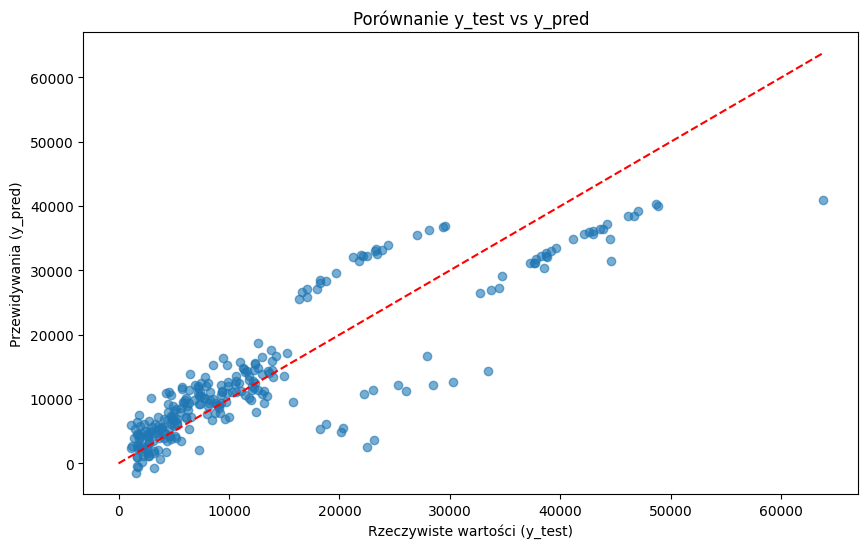

In [174]:
import matplotlib.pyplot as plt

# Porównanie rozkładu y_test i y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Linia idealnych przewidywań
plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Przewidywania (y_pred)")
plt.title("Porównanie y_test vs y_pred")
plt.show()

Przewidywanie kosztów dla nowych pacjentów

1. Utwórz nowe dane z uwzględnieniem wszystkich kolumn z X_train

In [209]:
# Przykładowe dane nowego pacjenta
new_patient = {
    'age': 35,
    'bmi': 28.5,
    'children': 2,
    'sex_male': 1,  # 1 = mężczyzna, 0 = kobieta
    'smoker_yes': 1,
    'smoker_age': 35 * 1,  # interakcja: age * smoker_yes
    'smoker_bmi': 28.5 * 1,  # interakcja: bmi * smoker_yes
    'bmi_squared': 28.5 ** 2
}

# Utwórz DataFrame i dodaj brakujące kolumny (jeśli istnieją)
new_data = pd.DataFrame([new_patient])

# Ustaw kolumny w tej samej kolejności co X_train
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

2. Skalowanie cech numerycznych

In [210]:
num_cols = ['age', 'bmi', 'children']
new_data[num_cols] = scaler.transform(new_data[num_cols])

3. Predykcja

In [211]:
predicted_charge = model.predict(new_data)
print(f"Przewidywany koszt: ${predicted_charge[0]:.2f}")

Przewidywany koszt: $28706.00


Dlaczego to działa?
reindex(columns=X_train.columns) zapewnia, że kolumny w new_data są w tej samej kolejności co w danych treningowych.

fill_value=0 ustawia brakujące kolumny (np. inne regiony) na 0, co jest bezpieczne dla modelu.

Weryfikacja kolumn
Sprawdź, czy kolumny w new_data zgadzają się z X_train:

In [203]:
print("Kolumny w X_train:", X_train.columns.tolist())
print("Kolumny w new_data:", new_data.columns.tolist())

Kolumny w X_train: ['age', 'bmi', 'children', 'smoker_yes', 'smoker_bmi', 'smoker_age', 'bmi_squared']
Kolumny w new_data: ['age', 'bmi', 'children', 'smoker_yes', 'smoker_bmi', 'smoker_age', 'bmi_squared']
